# 1D linear regression plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(42)

Let's generate some fixed values for $x$.

In [3]:
nsamples=20
xmax = 100
step = xmax // nsamples
x = np.arange(0,xmax,step)
x

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

For the sake of the argument, we generate two random values for $\beta$.

In [4]:
beta = np.random.uniform(0,20, size=2)
print(", ".join([f"beta_{it} = "+str(beta[it]) for it in range(2)]))

beta_0 = 7.49080237694725, beta_1 = 19.01428612819832


We now also need our random variable $\varepsilon$. We use the `randn` method which returns samples from a normal distribution $\mathcal{N}(0,1)$.

In [5]:
sigma_true = 50
epsilon = np.random.randn(nsamples)*sigma_true
epsilon

array([ 32.38442691,  76.15149282, -11.70766874, -11.70684785,
        78.96064078,  38.37173646, -23.4737193 ,  27.12800218,
       -23.17088464, -23.28648768,  12.09811358, -95.66401223,
       -86.24589163, -28.11437646, -50.64155602,  15.71236663,
       -45.40120378, -70.61518507,  73.28243845, -11.28881502])

Finally, we build the data generating process and calculate our observations $y$.

In [6]:
y = beta[0] + x*beta[1] + epsilon
y

array([  39.87522928,  178.71372584,  185.92599492,  280.99824645,
        466.73716572,  521.21969204,  554.44566693,  700.11881904,
        744.89136286,  839.84719047,  970.30322237,  957.61252719,
       1062.10207844, 1215.30502425, 1287.84927533, 1449.27462862,
       1483.23248886, 1553.08993821, 1792.05899236, 1802.55916953])

## Estimate $\hat{\beta}_0$ and $\hat{\beta}_1$

Use the formulae from the lecture to calculate the two estimators $\hat{\beta}_0$ and $\hat{\beta}_1$.

In [7]:
bar_x = np.mean(x)
bar_y = np.mean(y)

beta_1_hat = np.sum((x - bar_x)*(y - bar_y))/np.sum((x - bar_x)**2)
beta_0_hat = bar_y - beta_1_hat*bar_x

print(f"from model: beta_0_hat = {beta_0_hat} and beta_1_hat = {beta_1_hat}")

from model: beta_0_hat = 33.118747929378515 and beta_1_hat = 18.34082682118705


## Estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ using scikit-learn

See here for details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
lm = LinearRegression()

X = x.reshape(-1, 1) #????
linear_model = lm.fit(X, y)

betas = [linear_model.intercept_, linear_model.coef_[0]]
print(f"from sklearn: beta_0_hat = {betas[0]} and beta_1_hat = {betas[1]}")

from sklearn: beta_0_hat = 33.11874792937874 and beta_1_hat = 18.340826821187047


In [11]:
linear_model.coef_

array([18.34082682])

In [12]:
X

array([[ 0],
       [ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55],
       [60],
       [65],
       [70],
       [75],
       [80],
       [85],
       [90],
       [95]])

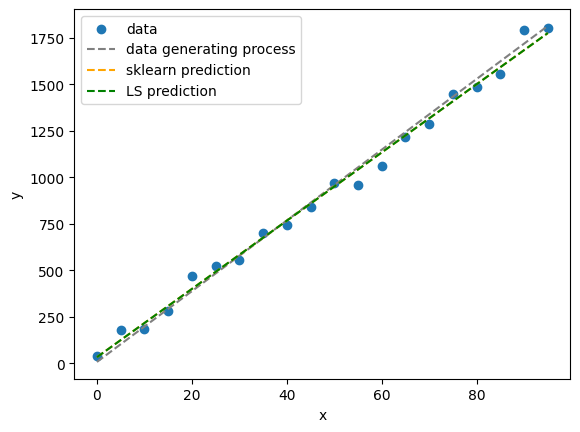

In [10]:
fig, ax = plt.subplots(1,1)
ax.scatter(x,y,label="data")
ax.plot([0,x[-1]],[beta[0],beta[0]+beta[1]*x[-1]],'--',label="data generating process",color="grey")
ax.plot([0,x[-1]],[betas[0],betas[0]+betas[1]*x[-1]],'--',label="sklearn prediction",color="orange")
ax.plot([0,x[-1]],[beta_0_hat,beta_0_hat+beta_1_hat*x[-1]],'--',label="LS prediction",color="green")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.savefig("1n_regression_fit.pdf")
fig.savefig("1n_regression_fit.svg")